# Generalized Principal Component Analysis of US Mortality Data

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from pca_glm import GPCA

This is the path to the data file on your system.  You will need
to change this to match the path used in the `vital_stats_prep.py`
script.

In [2]:
pa = "/nfs/kshedden/cdc_mortality/final/pop_mort.csv"
df = pd.read_csv(pa)

In [3]:
ix = ["Year", "Month", "Sex", "Age_group"]

In [4]:
dx = df.set_index(ix)
deaths = dx.loc[:, "Deaths"].unstack("Age_group")
deaths = deaths.fillna(1)

In [5]:
pop = dx.loc[:, "Population"].unstack("Age_group")
lpop = np.log(pop)

In [6]:
pca = GPCA(deaths, 2, offset=lpop, family=sm.families.Poisson())
r = pca.fit(maxiter=2000)

/nfs/kshedden/python3/lib/python3.7/site-packages/statsmodels/genmod/families/family.py:460: RuntimeWarning: divide by zero encountered in log
  return var_weights / scale * (endog * np.log(mu) - mu -
/nfs/kshedden/python3/lib/python3.7/site-packages/statsmodels/genmod/families/family.py:460: RuntimeWarning: invalid value encountered in subtract
  return var_weights / scale * (endog * np.log(mu) - mu -


/afs/umich.edu/user/k/s/kshedden/Projects/Workshops/mortality/python/pca_glm.py:270: UserWarning: GPCA did not converge
  warnings.warn("GPCA did not converge")


In [7]:
ages = deaths.columns

Text(0, 0.5, '...')

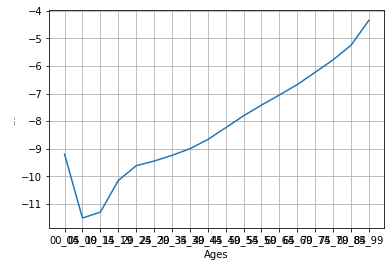

In [8]:
plt.grid(True)
plt.plot(ages, r.intercept)
plt.xlabel("Ages")
plt.ylabel("...")

Text(0, 0.5, '...')

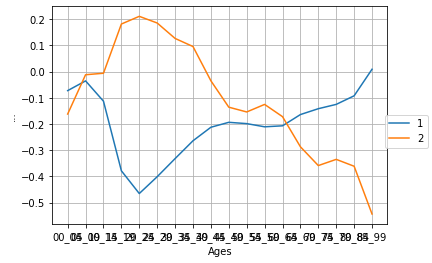

In [9]:
plt.grid(True)
plt.plot(ages, r.factors[:, 0], label="1")
plt.plot(ages, r.factors[:, 1], label="2")
ha, lb = plt.gca().get_legend_handles_labels()
plt.figlegend(ha, lb, "center right")
plt.xlabel("Ages")
plt.ylabel("...")

Text(0, 0.5, 'Scores for component 2')

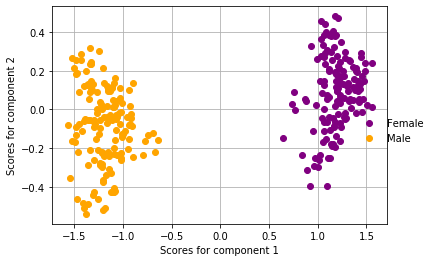

In [10]:
scores = pca.scores(r.params)
dm = dx.index.to_frame().unstack("Age_group")
sex = dm.loc[:, ("Sex", "70_74")].values

plt.grid(True)
col = {"Female": "purple", "Male": "orange"}
for s in "Female", "Male":
    ii = np.flatnonzero(sex == s)
    plt.plot(scores[ii, 0], scores[ii, 1], 'o', color=col[s], label=s)
ha, lb = plt.gca().get_legend_handles_labels()
leg = plt.figlegend(ha, lb, "center right")
leg.draw_frame(False)
plt.xlabel("Scores for component 1")
plt.ylabel("Scores for component 2")